In [6]:
# 1. Load Libraries & Data
# -------------------------------------------------
# This is hardcoded customer data for demonstration purposes
# (in real projects, you'd load from CSV, SQL, API, etc.)
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'customer_id': [1, 2, 3, 4, 5, 6],
    'name': ['Ali', 'Sara', 'Reza', 'Ali', 'Mona', 'Amir'],
    'age': [25, None, 18, 25, 300, 29],
    'city': ['Tehran', 'Mashhad', 'Tehran', 'Tehran', 'Shiraz', 'Tabriz'],
    'income': [3500, 4200, -2000, 3500, 5000, None],
    'purchase_data': ['2023-02-05', '2023/03/01', '2023-02-10', '2023-02-05', None, '2023-02-25']
}
df = pd.DataFrame(data)
df.head()

,customer_id,name,age,city,income,purchase_data
0,1,Ali,25.0,Tehran,3500.0,2023-02-05
1,2,Sara,NaN,Mashhad,4200.0,2023/03/01
2,3,Reza,18.0,Tehran,-2000.0,2023-02-10
3,4,Ali,25.0,Tehran,3500.0,2023-02-05
4,5,Mona,300.0,Shiraz,5000.0,None


In [7]:
# 2. Original Data Info
# -------------------------------------------------
# Shows structure, data types, and missing values before cleaning
print("Original Data Info:")
df.info()

Original Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    6 non-null      int64  
 1   name           6 non-null      object 
 2   age            5 non-null      float64
 3   city           6 non-null      object 
 4   income         5 non-null      float64
 5   purchase_data  5 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 420.0+ bytes


In [8]:
# 3. Clean Data
# -------------------------------------------------
# Cleaning steps:
# - Fill missing age/income with median
# - Fill missing purchase date with default
# - Convert negative income to positive
# - Cap age > 100 to median
# - Remove duplicate rows
def clean_data(df):
    df['age'] = df['age'].fillna(df['age'].median())
    df['income'] = df['income'].fillna(df['income'].median())
    df['purchase_data'] = df['purchase_data'].fillna("2023-01-01")
    df['income'] = df['income'].apply(lambda x: abs(x) if x < 0 else x)
    df.loc[df['age'] > 100, 'age'] = df['age'].median()
    df = df.drop_duplicates()
    return df

df_clean = clean_data(df.copy())
print("Cleaned Data:")
df_clean

Cleaned Data:


,customer_id,name,age,city,income,purchase_data
0,1,Ali,25.0,Tehran,3500.0,2023-02-05
1,2,Sara,25.0,Mashhad,4200.0,2023/03/01
2,3,Reza,18.0,Tehran,2000.0,2023-02-10
3,4,Ali,25.0,Tehran,3500.0,2023-02-05
4,5,Mona,25.0,Shiraz,5000.0,2023-01-01
5,6,Amir,29.0,Tabriz,3500.0,2023-02-25


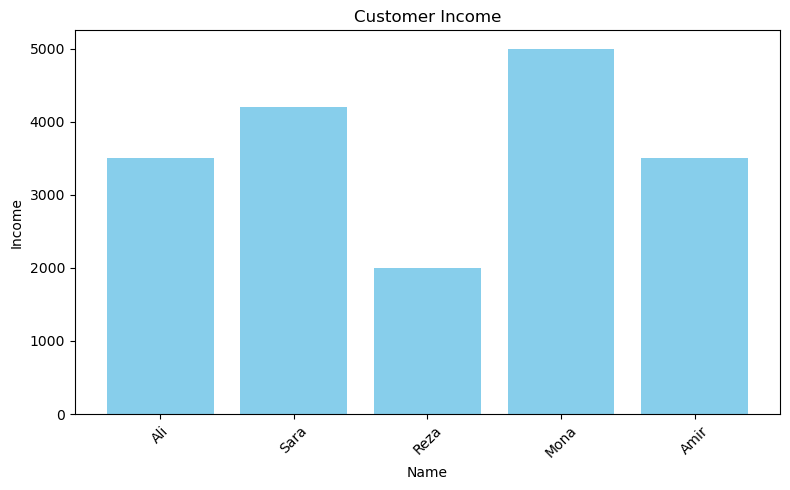

In [9]:
# 4. Plot Income
# -------------------------------------------------
# Bar chart of customer income after cleaning
plt.figure(figsize=(8,5))
plt.bar(df_clean['name'], df_clean['income'], color='skyblue')
plt.title('Customer Income')
plt.xlabel('Name'); plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('income_plot.png')
plt.show()

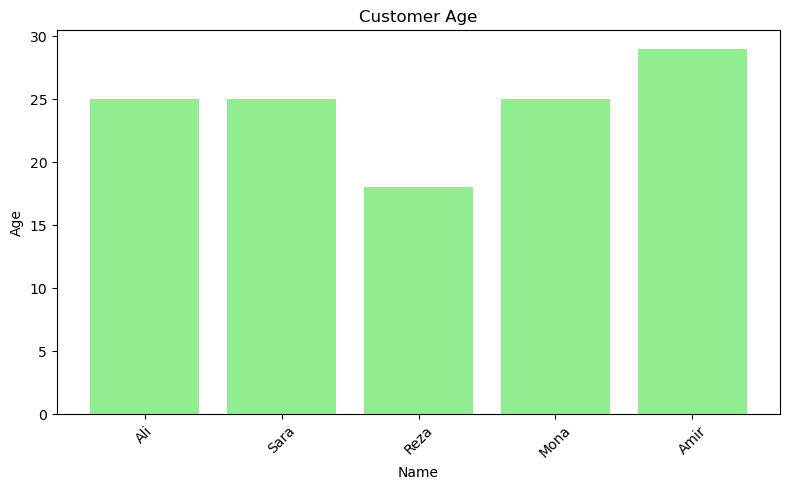

In [10]:
# 5. Plot Age
# -------------------------------------------------
# Bar chart of customer age after cleaning
plt.figure(figsize=(8,5))
plt.bar(df_clean['name'], df_clean['age'], color='lightgreen')
plt.title('Customer Age')
plt.xlabel('Name'); plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('age_plot.png')
plt.show()